## Часть первая. Исследование одномерной выборки.
### Составить вариационный ряд

In [1]:
import math
import pandas as pd
data = pd.read_csv('sample_100.csv', sep=';')['Crime_rate']
d_max, d_min = data.max(), data.min() - 1
k = 1 + 3.332 * math.log10(len(data))
h = math.ceil((d_max - d_min) / k)
print(f'Xmin = {d_min}; Xmax = {d_max}')
print(f'K = {k} = {math.floor(k)}; H = {h}')
data

Xmin = -1; Xmax = 990
K = 7.664 = 7; H = 130


0     137
1     255
2     223
3     117
4     297
     ... 
95     40
96    144
97    360
98     40
99    215
Name: Crime_rate, Length: 100, dtype: int64

In [2]:
series = {}
interval_starts = []
interval_ends = []
for i in range(math.floor(k)):
    c_min = d_min + h * i
    c_max = c_min + h
    interval_starts.append(c_min)
    interval_ends.append(c_max)
    series[f'{c_min}-{c_max}'] = data[(data > c_min) & (data <= c_max)].tolist()
series_n = pd.DataFrame({key: len(series[key]) for key in series}, index=['Count']).T
series_n['Centers'] = [(x[0] + x[1]) / 2 for x in zip(interval_starts, interval_ends)]
series_n['Relative'] = series_n['Count'] / 100
series_n

,Count,Centers,Relative
-1-129,37,64.0,0.37
129-259,27,194.0,0.27
259-389,13,324.0,0.13
389-519,10,454.0,0.10
519-649,7,584.0,0.07
649-779,4,714.0,0.04
779-909,1,844.0,0.01


### Полигон и гистограмма частот

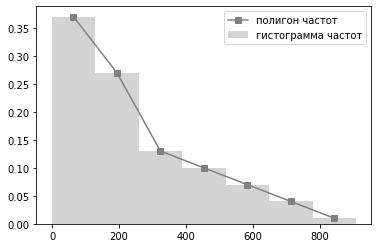

In [5]:
import matplotlib.pyplot as plt
import numpy as np
plt.plot(series_n['Centers'], series_n['Relative'], marker='s', label='полигон частот', color='gray')
plt.bar(np.array(interval_starts) + h / 2, series_n['Relative'], h, label='гистограмма частот', color='lightgray')
plt.legend()

plt.rcParams['axes.facecolor']='white'
plt.rcParams['savefig.facecolor']='white'
plt.savefig('../images/fig01.png', dpi=500)